In [13]:
#install.packages('xts')
#install.packages('forecast')
#install.packages('testcorr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape2’




In [15]:
library(xts)
library(readxl)
library(zoo)
library(forecast)
library(ggplot2)
library(readxl)
library(testcorr)

In [16]:
#source("modelling.R")

In [17]:
options(warn = -1) # Remove warnings

In [19]:
data = read_excel("Elec_30_11_train.xlsx", skip=1, col_types=c("text","numeric","numeric","numeric"))
data$Timestamp <- as.POSIXct(data$Timestamp, format="%m/%d/%Y %H:%M", tz="UTC")

oat  <- "OAT (F)"
power <- "Power (kW)"

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


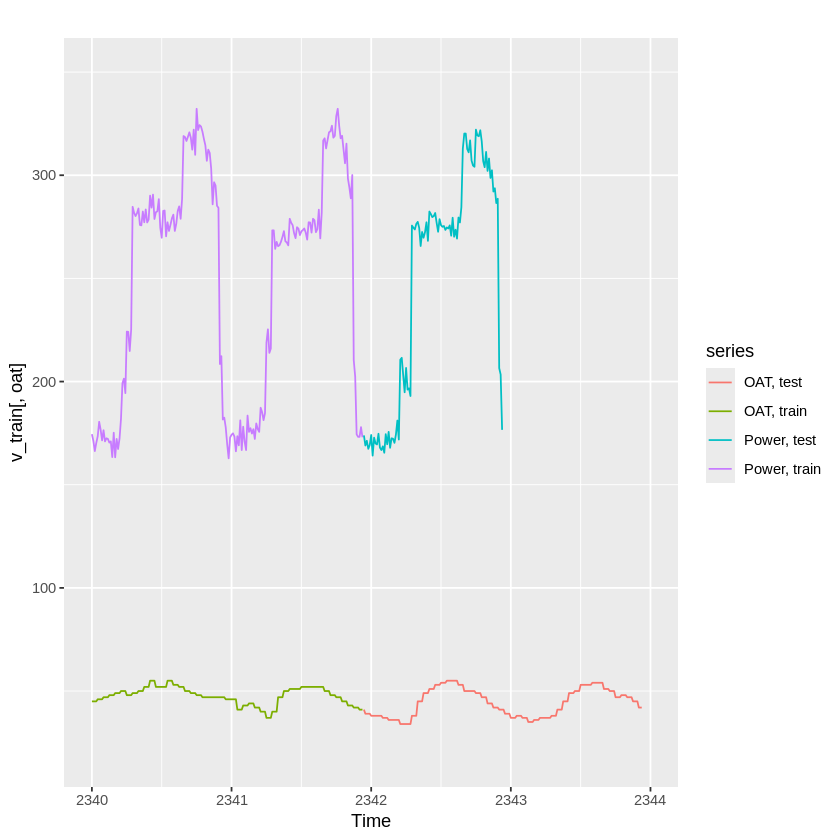

In [22]:
# Split in train/test
v <- ts(data[,1:3], start=c(2010,1), frequency=96)
v_start <- start(v)
v_end   <- end(v)

# remove 2 last periods for training set:
v_train <- window(v, start=v_start                     , end=c(v_end[1],v_end[2]-2*96))
# start after 2 to last period for testing set:
v_test  <- window(v, start=c(v_end[1], v_end[2]-2*96+1), end=v_end)

autoplot(v_train[,oat], series="OAT, train") + autolayer(v_test[,oat], series="OAT, test") + autolayer(v_train[,power], series="Power, train")  + autolayer(v_test[,power], series="Power, test") + xlim(c(2340,2344)) + ylim(c(20,350))

In [23]:
  autofit = auto.arima(v_train[,power])
  checkresiduals(autofit)

In [27]:
fit = Arima(v_train[,power], xreg=v_train[,oat], order=c(1,0,0), seasonal=c(0,0,1))
checkresiduals(fit)
tsdisplay(fit$residuals)

In [28]:
fit = Arima(v_train[,power], xreg=v_train[,oat], order=c(1,0,0), seasonal=c(0,1,3))
checkresiduals(fit)
tsdisplay(fit$residuals)